In [ ]:
import pandas as pd
import numpy as np
import json, os, uuid

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install app-store-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app, Sort, reviews_all

In [ ]:
from app_store_scraper import AppStore

In [ ]:
g_reviews = reviews_all(
        "com.spotify.music",
        sleep_milliseconds=0, # defaults to 0
       # lang='en', # defaults to 'en'
      #  country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
#a_reviews = AppStore('us', 'password-manager-myvault', '1138075747')
#a_reviews.review()

KeyboardInterrupt: ignored

In [ ]:
#cuma playstore
g_reviews = reviews_all(
        "com.spotify.music",
        sleep_milliseconds=0, # defaults to 0
       # lang='en', # defaults to 'en'
       # country='us', # defaults to 'us'
       # sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )

In [ ]:
#khusu playstore
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
#g_df2['laguage_code'] = 'en'
#g_df2['country_code'] = 'us'

In [ ]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

In [ ]:
a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'us'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)

In [ ]:
result = pd.concat([g_df2,a_df2])
result

NameError: ignored

In [ ]:
#khusus playstore
result = g_df2
result

,source,review_id,user_name,review_title,review_description,rating,thumbsUpCount,review_date,replyContent,repliedAt
0,Google Play,d699f29d-2551-40dc-bb8c-305bb4195c72,Deb Smith,None,Great music.,5,0,2023-02-02 11:25:13,None,NaT
1,Google Play,7d5756d1-9c8b-4c86-8e40-e666fcaa5467,callum mitchell,None,Paying for Spotify premium. And I am still get...,1,0,2023-02-02 11:24:43,None,NaT
2,Google Play,29f69c4d-e4fe-4db2-93ea-c2dd5232fd6d,Manpreet Kaur,None,"It's amazing, I love it ❤️",5,0,2023-02-02 11:23:25,None,NaT
3,Google Play,bbc303fb-b336-4951-a24c-b797b32e1f27,Raj Daxx,None,Are itna ad koun dalta hai . 30 minutes uninte...,1,0,2023-02-02 11:19:46,None,NaT
4,Google Play,5a89206e-bcfd-4d79-b264-5a38542c5a8d,Todd Hopson,None,It's a Solid app to store my offline music too...,5,0,2023-02-02 11:18:53,None,NaT
...,...,...,...,...,...,...,...,...,...,...
65068,Google Play,4cce18ce-56bb-4541-be79-cc006732c789,A J,None,I'm cancelling my subscription before the next...,1,0,2022-12-01 12:42:00,None,NaT
65069,Google Play,d4712cce-fe71-41b5-b64b-6e60aacb2f71,joseph manuel,None,Icon is crashing after the update.,5,0,2022-12-01 12:41:47,None,NaT
65070,Google Play,ba76781b-7b8a-4532-bfda-687490c30a72,Sherine,None,Excellent choice for all our music needs..indi...,5,0,2022-12-01 12:41:28,None,NaT
65071,Google Play,89f04848-bc4c-4575-bbeb-d409e576172b,Rohith Ravindran,None,Too good,5,0,2022-12-01 12:41:12,None,NaT


In [ ]:
#import pandas as pd

# Membuat dataframe dari hasil scraping
df = pd.DataFrame(result)

# Menyimpan dataframe ke file CSV
df.to_csv("hasil_scraping.csv", index=False)


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=d72a3751a3c46feec82863ef88806fa6a5171067f8e285b2faf9b90bb48a442c
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
#import pandas as pd
import langdetect

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("hasil_scraping.csv")
#df = pd.read_csv("user_reviews.csv")

# Mendeteksi bahasa dari kolom review_description saja
detected_languages = set()
for i in range(len(df)):
    try:
        lang = langdetect.detect(df.iloc[i]["review_description"])
        detected_languages.add(lang)
    except:
        pass

# Menampilkan bahasa yang terdeteksi saja
print("Bahasa yang terdeteksi:")
for lang in detected_languages:
    print(lang)


Bahasa yang terdeteksi:
kn
hr
sl
da
te
mr
lv
lt
ta
et
tr
sq
bn
hi
sv
zh-tw
cs
pa
ru
uk
fa
pl
hu
he
tl
ur
ko
fi
en
cy
th
el
es
ne
fr
gu
ca
af
so
no
it
ro
vi
zh-cn
sk
ja
pt
id
mk
nl
ml
de
ar
sw


In [ ]:
pip install babel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from babel import Locale

# Mendefinisikan set bahasa yang dideteksi sebelumnya
detected_languages = set(['et', 'so', 'da', 'sq', 'sl', 'en', 'pl', 'sv', 'hr', 'fa', 'th', 'ja', 'id', 'ca', 'no', 'he', 'cy', 'mk', 'tl', 'ro', 'kn', 'uk', 'pt', 'mr', 'te', 'fr', 'sw', 'ru', 'tr', 'hu', 'pa', 'ko', 'el', 'gu', 'cs', 'hi', 'ar', 'ne', 'lt', 'ta', 'de', 'bg', 'fi', 'it', 'sk', 'ml', 'vi', 'nl', 'bn', 'af', 'lv', 'es', 'ur'])

# Menerjemahkan kode bahasa ke nama bahasa yang dapat dibaca oleh manusia
for lang_code in detected_languages:
    locale = Locale.parse(lang_code)
    print(locale.get_language_name())


ಕನ್ನಡ
hrvatski
dansk
slovenščina
తెలుగు
मराठी
latviešu
lietuvių
български
தமிழ்
eesti
shqip
Türkçe
বাংলা
हिन्दी
svenska
ਪੰਜਾਬੀ
čeština
русский
українська
فارسی
polski
magyar
עברית
Filipino
اردو
한국어
suomi
English
ไทย
Cymraeg
Ελληνικά
español
नेपाली
français
ગુજરાતી
català
Afrikaans
Soomaali
norsk
română
italiano
Tiếng Việt
日本語
slovenčina
македонски
Indonesia
português
Nederlands
മലയാളം
Deutsch
العربية
Kiswahili


In [ ]:
import pandas as pd
import langdetect

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("hasil_scraping.csv")
#df = pd.read_csv("user_reviews.csv")

# Mendeteksi bahasa dari kolom review_description saja
language_counts = {}
for i in range(len(df)):
    try:
        lang = langdetect.detect(df.iloc[i]["review_description"])
        if lang in language_counts:
            language_counts[lang] += 1
        else:
            language_counts[lang] = 1
    except:
        pass

# Menampilkan jumlah data yang menggunakan setiap bahasa
for lang, count in language_counts.items():
    print("Bahasa {} digunakan dalam {} data".format(lang, count))


Bahasa en digunakan dalam 46865 data
Bahasa et digunakan dalam 275 data
Bahasa tl digunakan dalam 676 data
Bahasa nl digunakan dalam 312 data
Bahasa so digunakan dalam 2744 data
Bahasa it digunakan dalam 904 data
Bahasa sl digunakan dalam 624 data
Bahasa af digunakan dalam 1769 data
Bahasa no digunakan dalam 669 data
Bahasa de digunakan dalam 964 data
Bahasa ca digunakan dalam 945 data
Bahasa sw digunakan dalam 526 data
Bahasa cy digunakan dalam 325 data
Bahasa fr digunakan dalam 920 data
Bahasa ro digunakan dalam 1279 data
Bahasa tr digunakan dalam 113 data
Bahasa pt digunakan dalam 218 data
Bahasa pl digunakan dalam 417 data
Bahasa cs digunakan dalam 115 data
Bahasa lt digunakan dalam 29 data
Bahasa id digunakan dalam 857 data
Bahasa es digunakan dalam 408 data
Bahasa sk digunakan dalam 340 data
Bahasa da digunakan dalam 209 data
Bahasa sv digunakan dalam 201 data
Bahasa vi digunakan dalam 138 data
Bahasa fi digunakan dalam 205 data
Bahasa sq digunakan dalam 126 data
Bahasa hu diguna

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

In [ ]:
import random

# Load the dataset
df
# Filter the dataset to only include records with rating 5
rating_5 = df[df['rating'] == 5]

# Remove 110.570 random records with rating 5
rating_5_sample = rating_5.sample(n=110570, random_state=42)
rating_5_remaining = rating_5.drop(rating_5_sample.index)

# Combine the remaining records with ratings other than 5
dataset_clean = pd.concat([df[df['rating'] != 5], rating_5_remaining])

# Save the cleaned dataset to a new file
dataset_clean.to_csv("dataset_clean.csv", index=False)


In [ ]:
dataset = pd.read_csv('dataset_clean.csv')

In [ ]:
dataset

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
1,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
2,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
3,Google Play,673c0edc-474d-4623-b7f7-7f435bac0daa,Aza Plays,NaN,Spotify just ruining their own app can't even ...,1,10,2023-01-13 01:40:46,NaN,NaN,en,us
4,Google Play,9ac00066-0bb8-4c33-9b9d-22517ffa6ea0,Dapinder Kaur,NaN,Good but too much ads.,4,2,2023-01-13 01:39:36,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
168622,Google Play,4ed1df6d-89fd-4f94-a9ac-d32fa54d979f,Pierluigi Annuario,NaN,The app turn off after 3 song,5,0,2022-04-18 10:54:04,NaN,NaN,en,us
168623,Google Play,15aee995-c4f1-421a-adae-7d78e590145f,Sundar Lal,NaN,Best aap for songs,5,0,2022-04-18 10:41:27,NaN,NaN,en,us
168624,Google Play,20d3f5f2-a5a7-453f-acb0-89821e2ff6d3,bayu setiawan,NaN,Reliabke,5,0,2022-04-18 10:36:30,NaN,NaN,en,us
168625,Google Play,64c67f33-3fd1-4e7b-ac9e-93710beb73ed,kevin williams,NaN,Brilliant way for music,5,0,2022-04-18 10:19:35,NaN,NaN,en,us


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=fc3a124d684c288914598683712eefa27855177cf5da35fffa71e7cedd320481
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


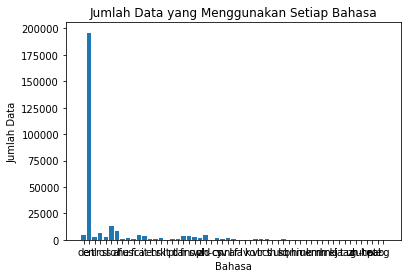

In [ ]:
import pandas as pd
import langdetect
import matplotlib.pyplot as plt

# Membaca data dari file CSV yang disimpan
dataset

# Mendeteksi bahasa dari kolom review_description saja
language_counts = {}
for i in range(len(df)):
    try:
        lang = langdetect.detect(df.iloc[i]["review_description"])
        if lang in language_counts:
            language_counts[lang] += 1
        else:
            language_counts[lang] = 1
    except:
        pass

# Membuat bar chart dari jumlah data yang menggunakan setiap bahasa
plt.bar(language_counts.keys(), language_counts.values())
plt.xlabel("Bahasa")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data yang Menggunakan Setiap Bahasa")
plt.show()


In [ ]:
dataset

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
1,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
2,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
3,Google Play,673c0edc-474d-4623-b7f7-7f435bac0daa,Aza Plays,NaN,Spotify just ruining their own app can't even ...,1,10,2023-01-13 01:40:46,NaN,NaN,en,us
4,Google Play,9ac00066-0bb8-4c33-9b9d-22517ffa6ea0,Dapinder Kaur,NaN,Good but too much ads.,4,2,2023-01-13 01:39:36,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
168622,Google Play,4ed1df6d-89fd-4f94-a9ac-d32fa54d979f,Pierluigi Annuario,NaN,The app turn off after 3 song,5,0,2022-04-18 10:54:04,NaN,NaN,en,us
168623,Google Play,15aee995-c4f1-421a-adae-7d78e590145f,Sundar Lal,NaN,Best aap for songs,5,0,2022-04-18 10:41:27,NaN,NaN,en,us
168624,Google Play,20d3f5f2-a5a7-453f-acb0-89821e2ff6d3,bayu setiawan,NaN,Reliabke,5,0,2022-04-18 10:36:30,NaN,NaN,en,us
168625,Google Play,64c67f33-3fd1-4e7b-ac9e-93710beb73ed,kevin williams,NaN,Brilliant way for music,5,0,2022-04-18 10:19:35,NaN,NaN,en,us


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e80fa609722e2295faeffa2aa90b601ea9acfbd81041ad7e3a517f658e998674
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
import pandas as pd
from langdetect import detect

# Load data into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

# Create a dictionary to store the examples for each language
examples = {}

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Get the language of the review description
    language = detect(row['review_description'])
    
    # If we haven't seen this language before, add it to the dictionary
    if language not in examples:
        examples[language] = row['review_description']
        
# Print the examples for each language
for language, example in examples.items():
    print("Language:", language)
    print("Example:", example)
    print("\n")

LangDetectException: ignored

In [ ]:
import pandas as pd
import langdetect

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

# Mendeteksi bahasa dari kolom review_description saja
language_examples = {}
for i in range(len(df)):
    try:
        lang = langdetect.detect(df.iloc[i]["review_description"])
        if lang in language_examples:
            pass
        else:
            language_examples[lang] = df.iloc[i]["review_description"]
    except:
        pass

# Menampilkan contoh review_description pada setiap bahasa yang terdeteksi
for lang, example in language_examples.items():
    print("Contoh review_description dalam bahasa {}: {}".format(lang, example))


Contoh review_description dalam bahasa de: " BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'S AND THAT'S ALL GOOD, 5 TRIPLE STAR'S PLUS 4SHO " !!!
Contoh review_description dalam bahasa en: Bruh Y can't I listen to the music I searched up and pressed play on?
Contoh review_description dalam bahasa tl: Amazing app....
Contoh review_description dalam bahasa ro: Nice
Contoh review_description dalam bahasa sl: I love it like my favorite podcast
Contoh review_description dalam bahasa so: good
Contoh review_description dalam bahasa af: I like it very much
Contoh review_description dalam bahasa hu: Only get 10 SECONDS A SONG
Contoh review_description dalam bahasa es: Desde hace unos días no está funcionando correctamente. Cuando abro el app está se queda cargando por mucho tiempo y entonces me pide que lo cierre. Esto está sucediendo desde que instalé la última actualización hace unos días.
Contoh review_description dalam bahasa sw: Take away ads :((
Contoh review_description dalam bahasa fi: Lu

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

**BAHSA BAHASA YANG DIGUNAKAN**

In [ ]:
import pandas as pd
import langdetect
import random

# Membaca data dari file CSV yang disimpan
df1 = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

# Mendeteksi bahasa dari kolom review_description saja
language_reviews = {}
for i in range(len(df)):
    try:
        lang = langdetect.detect(df.iloc[i]["review_description"])
        if lang in language_reviews:
            language_reviews[lang].append(df.iloc[i]["review_description"])
        else:
            language_reviews[lang] = [df.iloc[i]["review_description"]]
    except:
        pass

# Menampilkan satu contoh review_description untuk setiap bahasa yang terdeteksi
for lang, reviews in language_reviews.items():
    random_review = random.choice(reviews)
    print("Contoh review dalam bahasa {}: {}".format(lang, random_review))


Contoh review dalam bahasa de: Wonderful Apk
Contoh review dalam bahasa en: I love Spotify but too many ads
Contoh review dalam bahasa tl: Amazing 👌🙌😍
Contoh review dalam bahasa ro: Nice
Contoh review dalam bahasa sk: love spotify
Contoh review dalam bahasa no: Best app ever
Contoh review dalam bahasa so: NO YOUTUBE SONGS
Contoh review dalam bahasa hu: AMAzing
Contoh review dalam bahasa es: Me gusta la aplicación, no la he utilizado demasiado, pero lo que he visto, me gusta.
Contoh review dalam bahasa fi: Brilliant
Contoh review dalam bahasa ca: Excellent
Contoh review dalam bahasa af: Awesome app!!!
Contoh review dalam bahasa id: Not bad
Contoh review dalam bahasa et: Kk o on mm n AA. O. O. Nn ko oook . .j. look oi9i o lkk. Kk okk ko ok. 9 loololooo o ok oook k o9ooook9o ookkkkoo o9 o 9 okoka ok ki90 ji kk 9 ok ⁹i⁰i good you 0i AA nuv k knnñ o 9 on mo oo lo ok kk oo ooooool0 mm o kooo ooooó0 loll bk kk. ok 9kk kk o 9o o 9 o m in n 9 no i9onKkkkkkkkk.m. Kkkk k. K.kk KKK k k. K. Kkkkk o

In [ ]:
df

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,2614b8e7-9637-4d90-bdca-fe87794cd402,Eugene Carl Ryan Sr.,NaN,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5,0,2023-01-14 06:24:56,NaN,NaN,en,us
1,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
2,Google Play,f2133e86-2185-4452-9805-a99b0d70ad79,Reema,NaN,Amazing app....,5,0,2023-01-13 01:55:07,NaN,NaN,en,us
3,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
4,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
279192,Google Play,9a2bdafd-ebb7-412a-8261-0a83c68cd275,StrangerBad Day,NaN,I like this app.. Nice!!!!!,5,0,2022-04-18 09:58:13,NaN,NaN,en,us
279193,Google Play,6b6a7744-1577-4e5b-b5c1-c1f482288ed2,Queenelle Quainoo owusu,NaN,It is so good l can play Roblox and listen 👂 t...,4,0,2022-04-18 09:57:27,NaN,NaN,en,us
279194,Google Play,d987bdd1-736d-4c91-81fe-77368724369b,Sharon Sng,NaN,Bad experience with the latest update. Choppy ...,1,1,2022-04-18 09:56:05,NaN,NaN,en,us
279195,Google Play,50e3f230-1bb3-42db-8fc4-c76389887e03,Lawrence Bagbagay,NaN,good,5,0,2022-04-18 09:55:22,NaN,NaN,en,us


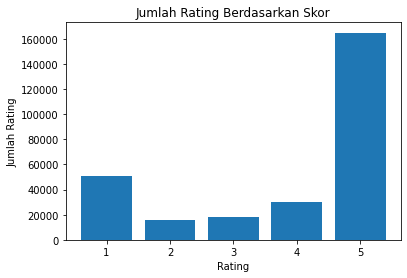

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

# Menghitung jumlah rating untuk setiap rating
rating_counts = df["rating"].value_counts()

# Membuat bar chart untuk menampilkan jumlah rating
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Jumlah Rating")
plt.title("Jumlah Rating Berdasarkan Skor")
plt.xticks(rating_counts.index)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279197 entries, 0 to 279196
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   source                   279197 non-null  object 
 1   review_id                279197 non-null  object 
 2   user_name                279193 non-null  object 
 3   review_title             0 non-null       float64
 4   review_description       279188 non-null  object 
 5   rating                   279197 non-null  int64  
 6   thumbs_up                279197 non-null  int64  
 7   review_date              279197 non-null  object 
 8   developer_response       4247 non-null    object 
 9   developer_response_date  4247 non-null    object 
 10  laguage_code             279197 non-null  object 
 11  country_code             279197 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 25.6+ MB


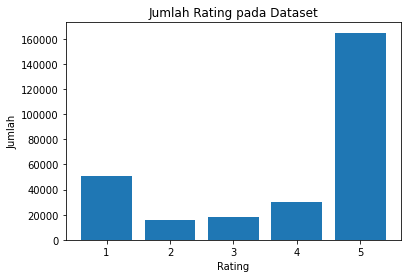

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV yang disimpan
df

# Menghitung jumlah rating
rating_counts = df['rating'].value_counts().sort_index()

# Menampilkan bar chart untuk jumlah rating
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.title("Jumlah Rating pada Dataset")
plt.xticks(rating_counts.index)
plt.show()


In [ ]:
#import pandas as pd

# Membaca data dari file CSV yang disimpan
df

# Menghitung jumlah masing-masing rating
rating_counts = df['rating'].value_counts().sort_index()

# Menampilkan jumlah masing-masing rating
for rating, count in rating_counts.items():
    print("Jumlah rating {} adalah {}".format(rating, count))


Jumlah rating 1 adalah 50817
Jumlah rating 2 adalah 15392
Jumlah rating 3 adalah 18004
Jumlah rating 4 adalah 30183
Jumlah rating 5 adalah 164801


In [ ]:
#import pandas as pd

# Membaca data dari file CSV yang disimpan
df 
#df = pd.read_csv("user_reviews.csv")

# Menyimpan setiap rating yang berbeda dalam dictionary
ratings = {}
for i in range(len(df)):
    rating = df.iloc[i]["rating"]
    if rating in ratings:
        ratings[rating].append(df.iloc[i]["review_description"])
    else:
        ratings[rating] = [df.iloc[i]["review_description"]]

# Menampilkan satu contoh review description pada masing-masing nilai rating
for rating, descriptions in ratings.items():
    print("Contoh review description dengan rating {}: {}".format(rating, descriptions[0]))


Contoh review description dengan rating 5: " BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'S AND THAT'S ALL GOOD, 5 TRIPLE STAR'S PLUS 4SHO " !!!
Contoh review description dengan rating 3: Bruh Y can't I listen to the music I searched up and pressed play on?
Contoh review description dengan rating 2: There is no way to add podcast episodes to my queue on my phone. It's also very easy to accidentally swipe and skip episodes or clear the queue. Other apps like PocketCasts are much easier to use.
Contoh review description dengan rating 4: It's a great music play but or at least for me when I logged in with my new phone it didn't let me play the song I wanted it picked a random song from my playlist. I want them to fix this it also has a thirdy second ad for almost every song.
Contoh review description dengan rating 1: Spotify just ruining their own app can't even press repeat button anymore unless u have to buy premium 🙄


In [ ]:
import random

# Membaca data dari file CSV
df 

# Membuat list yang berisi semua nilai rating
rating_values = df["rating"].unique().tolist()

# Menampilkan satu contoh review description secara random pada setiap nilai rating
for rating in rating_values:
    random_index = random.randint(0, len(df[df["rating"] == rating]) - 1)
    random_review = df[df["rating"] == rating].iloc[random_index]["review_description"]
    print("Nilai rating: {}\nContoh review: {}\n".format(rating, random_review))


Nilai rating: 5
Contoh review: Great variety of music.

Nilai rating: 3
Contoh review: Good

Nilai rating: 2
Contoh review: Kebanyakan iklan, jd kayak maksa bgt buat beli premiumnya, mau dengerin musik jd gk dapet feelnya 👎

Nilai rating: 4
Contoh review: Is very good

Nilai rating: 1
Contoh review: What kind of retarded mechanics are these? I click a song and another song plays, not the one I clicked. I click a song in the favourites list, and it only plays 10 seconds of it. I can only skip songs a limited number of times. Absolutely pathetic. The ps4 version is not like that.



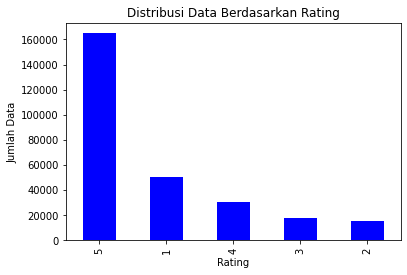

In [ ]:
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df 

# Menghitung jumlah data untuk setiap rating
rating_counts = df['rating'].value_counts()

# Menampilkan distribusi data berdasarkan rating menggunakan bar chart
rating_counts.plot(kind='bar', x='rating', y='count', color='blue')
plt.xlabel('Rating')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data Berdasarkan Rating')
plt.show()

In [ ]:
#import pandas as pd

# Membaca data dari file CSV yang disimpan
df 

# Menghitung jumlah masing-masing rating
rating_counts = df["rating"].value_counts()

# Menampilkan distribusi data berdasarkan rating
print("Distribusi Data Berdasarkan Rating:")
print(rating_counts)


Distribusi Data Berdasarkan Rating:
5    164801
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


In [ ]:
import pandas as pd
import random

# Membaca data dari file CSV yang disimpan
df 

# Mendapatkan jumlah data rating 5 dan 1
rating_5_count = len(df[df["rating"] == 5])
rating_1_count = len(df[df["rating"] == 1])

# Menentukan jumlah data yang ingin diambil untuk rating 5 dan 1
sampled_rating_5_count = rating_1_count
sampled_rating_1_count = rating_1_count

# Melakukan undersampling data rating 5 dan 1
sampled_rating_5 = df[df["rating"] == 5].sample(sampled_rating_5_count)
sampled_rating_1 = df[df["rating"] == 1].sample(sampled_rating_1_count)

# Menggabungkan data undersampled rating 5 dan 1 dengan data lainnya
df_balanced = pd.concat([sampled_rating_5, sampled_rating_1, df[(df["rating"] != 5) & (df["rating"] != 1)]])

# Menyimpan data hasil undersampling ke dalam file CSV
df_balanced.to_csv("data_balanced.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("hasil_scraping.csv")

# Menentukan data dengan rating 5 sebagai data mayoritas
df_majority = df[df.rating == 5]

# Menentukan data dengan rating selain 5 sebagai data minoritas
df_minority = df[df.rating != 5]

# Menentukan jumlah data baru yang dibutuhkan dari setiap data minoritas
number_of_samples = len(df_majority)
df_minority_downsampled = resample(df_minority, replace=False, n_samples=number_of_samples, random_state=123)

# Menggabungkan data mayoritas dan data minoritas yang sudah dibawah-sampling
df_downsampled = pd.concat([df_majority, df_minority_downsampled])

# Menentukan urutan data secara acak
df_downsampled = df_downsampled.sample(frac=1, random_state=123).reset_index(drop=True)

# Menyimpan data yang sudah dibawah-sampling ke dalam file CSV
df_downsampled.to_csv("hasil_scraping_downsampled.csv", index=False)


ValueError: ignored

In [ ]:
jajal1 = pd.read_csv('hasil_scraping_downsampled.csv')

# Menghitung jumlah masing-masing rating
rating_counts = df["rating"].value_counts()

# Menampilkan distribusi data berdasarkan rating
print("Distribusi Data Berdasarkan Rating:")
print(rating_counts)

Distribusi Data Berdasarkan Rating:
5    164801
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Membaca data dari file CSV yang disimpan
df 

# Menyimpan data rating 5
rating_5 = df[df.rating==5]

# Menyimpan data rating 1, 4, 3, 2
rating_others = df[df.rating != 5]

# Melakukan undersampling data rating 5
rating_5_downsampled = resample(rating_5,
                                replace=False,
                                n_samples=rating_others.shape[0],
                                random_state=123)

# Menyatukan data rating 5 yang sudah di-undersample dengan data rating 1, 4, 3, 2
df_downsampled = pd.concat([rating_5_downsampled, rating_others])

# Menampilkan distribusi data rating setelah di-undersample
print(df_downsampled.rating.value_counts())


5    114396
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


In [ ]:
hasil = pd.read_csv ('data_balanced.csv')

In [ ]:
hasil

# Menghitung jumlah masing-masing rating
rating_counts = df["rating"].value_counts()

# Menampilkan distribusi data berdasarkan rating
print("Distribusi Data Berdasarkan Rating:")
print(rating_counts)


Distribusi Data Berdasarkan Rating:
5    164801
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.utils import resample
import imblearn

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("hasil_scraping.csv")

# Memisahkan data menjadi dua, data dengan rating 5 dan data dengan rating selain 5
df_5 = df[df["rating"] == 5]
df_not_5 = df[df["rating"] != 5]

# Undersampling data dengan rating 5 hingga jumlah data menjadi sama dengan data dengan rating selain 5
df_5_undersampled = resample(df_5, 
                             replace=False,# jangan menggunakan sampel ulang
                             n_samples=len(df_not_5),# jumlah sampel harus sama dengan data selain 5
                             random_state=123) # untuk memastikan hasil yang sama pada setiap run

#menggabungkan lagi uhuy
df_balanced = pd.concat([df_5_undersampled, df_not_5])   

#cek data lagi
print(df_balanced['rating'].value_counts())

5    114396
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Membaca data dari file CSV yang disimpan
df = pd.read_csv("hasil_scraping.csv")

# Mendefinisikan feature dan target
X = df["review_description"].values
y = df["rating"].values

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X.reshape(-1, 1), y)

# Membuat dataframe baru dengan hasil undersampling
df_resampled = pd.DataFrame({"review_description": X_resampled.ravel(), "rating": y_resampled})

# Menyimpan dataframe baru ke dalam file CSV
df_resampled.to_csv("hasil_scraping_resampled.csv", index=False)


In [ ]:
sampel1 = pd.read_csv('hasil_scraping_resampled.csv')

In [ ]:
sampel1

# Menghitung jumlah masing-masing rating
rating_counts = df["rating"].value_counts()

# Menampilkan distribusi data berdasarkan rating
print("Distribusi Data Berdasarkan Rating:")
print(rating_counts)

Distribusi Data Berdasarkan Rating:
5    164801
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64


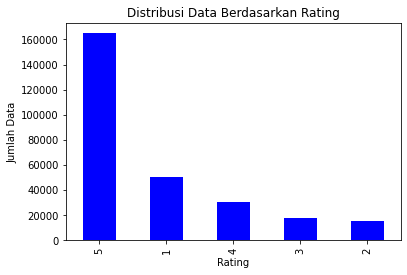

In [ ]:
sampel1

# Menghitung jumlah data untuk setiap rating
rating_counts = df['rating'].value_counts()

# Menampilkan distribusi data berdasarkan rating menggunakan bar chart
rating_counts.plot(kind='bar', x='rating', y='count', color='blue')
plt.xlabel('Rating')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data Berdasarkan Rating')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Membaca dataset
koce = pd.read_csv("hasil_scraping.csv")

# Menentukan jumlah data yang akan diambil dari setiap rating
min_count = df['rating'].value_counts().min()

# Melakukan undersampling pada setiap rating
df_balanced = pd.DataFrame(columns=df.columns)
for rating in df['rating'].unique():
    df_rating = df[df['rating'] == rating].sample(min_count)
    df_balanced = pd.concat([df_balanced, df_rating])

# Memisahkan dataset menjadi data latih dan uji
X = df_balanced.drop(columns=['rating'])
y = df_balanced['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


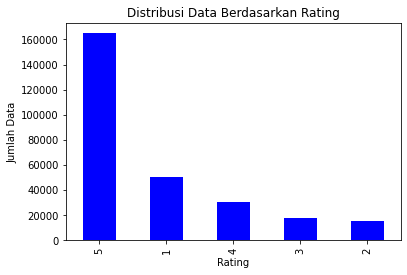

In [ ]:
koce

# Menghitung jumlah data untuk setiap rating
rating_counts = df['rating'].value_counts()

# Menampilkan distribusi data berdasarkan rating menggunakan bar chart
rating_counts.plot(kind='bar', x='rating', y='count', color='blue')
plt.xlabel('Rating')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data Berdasarkan Rating')
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Membaca data dari file CSV
koce2 = pd.read_csv("hasil_scraping.csv")

# Mengambil kolom rating saja sebagai target
y = df["rating"]

# Mengecek distribusi data sebelum balancing
print("Distribusi data sebelum balancing:")
print(y.value_counts())

# Melakukan balancing data dengan RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(df, y)

# Mengecek distribusi data setelah balancing
print("\nDistribusi data setelah balancing:")
print(pd.Series(y_resampled).value_counts())


Distribusi data sebelum balancing:
5    164801
1     50817
4     30183
3     18004
2     15392
Name: rating, dtype: int64

Distribusi data setelah balancing:
5    164801
2    164801
1     50817
4     30183
3     18004
Name: rating, dtype: int64


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Membaca dataset
df = pd.read_csv("/content/drive/MyDrive/review_spotifi/hasil_scraping.csv")

# Menentukan jumlah data yang akan diambil dari setiap rating
min_count = df['rating'].value_counts().min()

# Melakukan undersampling pada setiap rating
df_balanced = pd.DataFrame(columns=df.columns)
for rating in df['rating'].unique():
    df_rating = df[df['rating'] == rating].sample(min_count)
    df_balanced = pd.concat([df_balanced, df_rating])

# Memisahkan dataset menjadi data latih dan uji
X = df_balanced.drop(columns=['rating'])
y = df_balanced['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


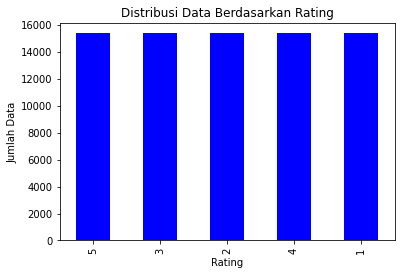

In [ ]:
df_balanced

# Menghitung jumlah data untuk setiap rating
rating_counts = df_balanced['rating'].value_counts()

# Menampilkan distribusi data berdasarkan rating menggunakan bar chart
rating_counts.plot(kind='bar', x='rating', y='count', color='blue')
plt.xlabel('Rating')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data Berdasarkan Rating')
plt.show()

In [ ]:
df_balanced

# Menghitung jumlah masing-masing rating
rating_counts = df_balanced["rating"].value_counts()

# Menampilkan distribusi data berdasarkan rating
print("Distribusi Data Berdasarkan Rating:")
print(rating_counts)

Distribusi Data Berdasarkan Rating:
5    15392
3    15392
2    15392
4    15392
1    15392
Name: rating, dtype: int64


In [ ]:
df_balanced

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
229045,Google Play,17ea8fd3-bbad-4910-84a8-e0bff29ea452,jayshri rathod,NaN,nice aap all type of song in this app,5,0,2022-06-02 08:52:08,NaN,NaN,en,us
44849,Google Play,0e09aa07-6eb9-4f00-a93b-9080f2818fc1,Malisa Shook (Missie),NaN,I love it's all the music I love an NO ADS it'...,5,0,2022-12-01 05:45:43,NaN,NaN,en,us
171362,Google Play,57f0e42d-4d78-4226-a51d-f0d6cf58a96d,Onyinye Usi,NaN,Really love this app great for listening to mu...,5,0,2022-07-25 17:04:09,NaN,NaN,en,us
14130,Google Play,4254625e-fe66-4762-964f-ca823b39b644,Jesse,NaN,"Awesome, I listen to my music day and night ev...",5,0,2022-12-28 14:13:18,NaN,NaN,en,us
197344,Google Play,01668149-e665-4780-bdcc-9902d49a71ab,Sumedha n moonmoon mallick,NaN,Awsome,5,0,2022-07-02 10:02:00,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
178986,Google Play,cad89b1d-4235-4601-9f1d-070311e13965,Gabriel Mahicon,NaN,When I play the music I want it plays differen...,1,0,2022-07-18 22:16:33,NaN,NaN,en,us
105182,Google Play,c0003002-683f-4444-8936-da42178db1e1,Entertainment entertainment,NaN,Using this app for listen advertise🥲,1,0,2022-09-29 13:29:03,NaN,NaN,en,us
200191,Google Play,518fe004-926f-445c-9c55-a5de5c281069,Hassan Kouyate,NaN,Would've been 5 star but the shuffle music isn...,1,0,2022-06-29 17:29:47,NaN,NaN,en,us
42597,Google Play,4484a927-88db-468b-843a-47ff0ef7655a,Alexandra Garchitorena,NaN,Corrupt!!! Fake data!!!!,1,0,2022-12-02 00:20:19,NaN,NaN,en,us


In [ ]:
import pandas as pd

# membaca file csv hasil scraping
df = pd.read_csv('/content/drive/MyDrive/review_spotifi/dataset_clean.csv')

# mengubah kolom "review_date" menjadi tipe datetime
df['review_date'] = pd.to_datetime(df['review_date'])

# mencari tanggal paling baru
most_recent_date = df['review_date'].max()
print("Tanggal paling baru:", most_recent_date)

# mencari tanggal paling lama
oldest_date = df['review_date'].min()
print("Tanggal paling lama:", oldest_date)


Tanggal paling baru: 2023-01-13 01:55:30
Tanggal paling lama: 2022-04-18 09:56:05


In [ ]:
#drop not used attributes
dataset.drop(['source', 'review_id', 'user_name', 'review_title', 'thumbs_up', 'review_date', 'developer_response', 'developer_response_date', 'laguage_code', 'country_code'], axis=1, inplace=True)
print(dataset)

KeyError: ignored

In [ ]:
dataset

,review_description,rating
0,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5
1,Bruh Y can't I listen to the music I searched ...,3
2,Amazing app....,5
3,There is no way to add podcast episodes to my ...,2
4,It's a great music play but or at least for me...,4
...,...,...
279192,I like this app.. Nice!!!!!,5
279193,It is so good l can play Roblox and listen 👂 t...,4
279194,Bad experience with the latest update. Choppy ...,1
279195,good,5


In [ ]:


# Load data
dataset

# Drop missing values
dataset = dataset.dropna()

# Keep only the top 5 rows
dataset = dataset.head(5)

# Save to a new file
dataset.to_csv('data_filtered.csv', index=False)


In [ ]:
df = pd.read_csv('data_filtered.csv')

In [ ]:
df

,review_description,rating
0,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5
1,Bruh Y can't I listen to the music I searched ...,3
2,Amazing app....,5
3,There is no way to add podcast episodes to my ...,2
4,It's a great music play but or at least for me...,4


In [ ]:
dataset['review_description'] = dataset['review_description'].str.lower()

# Print the first 5 rows of the text column after case folding
dataset

,review_description,rating
0,beautiful sounds is good music to ure ears an...,5
1,bruh y cant i listen to the music i searched u...,3
2,amazing app,5
3,there is no way to add podcast episodes to my ...,2
4,its a great music play but or at least for me ...,4


In [ ]:
# import pandas as pd
import re

# membaca data dari file csv
dataset

# mengambil kolom "review_description" saja
review_description = dataset["review_description"]

# menghapus tanda baca menggunakan re.sub
review_description = review_description.apply(lambda x: re.sub(r'[^\w\s]','',x))

# print hasil case folding
dataset


,review_description,rating
0,beautiful sounds is good music to ure ears an...,5
1,bruh y cant i listen to the music i searched u...,3
2,amazing app,5
3,there is no way to add podcast episodes to my ...,2
4,its a great music play but or at least for me ...,4


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Membaca dataset dari file CSV
dataset

# Menentukan daftar stop words bahasa Inggris
stop_words = set(stopwords.words("english"))

# Fungsi untuk menghilangkan stop words
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

# Aplikasi fungsi pada kolom "review_description"
dataset["review_description"] = dataset["review_description"].apply(lambda x: remove_stop_words(x))

# Simpan hasil pada file baru
dataset


,review_description,rating
0,beautiful sounds good music ure ears thats goo...,5
1,bruh cant listen music searched pressed play,3
2,amazing app,5
3,way add podcast episodes queue phone also easy...,2
4,great music play least logged new phone didnt ...,4


In [ ]:
import nltk
from nltk.tokenize import WordPunctTokenizer

def tokenize_wordpiece(text):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

dataset['review_description'] = dataset['review_description'].apply(lambda x: tokenize_wordpiece(x))
dataset

TypeError: ignored

In [ ]:
dataset

,review_description,rating
0,"[beautiful, sounds, good, music, ure, ears, th...",5
1,"[bruh, cant, listen, music, searched, pressed,...",3
2,"[amazing, app]",5
3,"[way, add, podcast, episodes, queue, phone, al...",2
4,"[great, music, play, least, logged, new, phone...",4


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.0 MB/s eta 0:00:00


In [ ]:
import transformers

# Load BERT Tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")

# Contoh kalimat
text = "great,music,play,least,logged,new,phone,didnt,let,play,song,wanted,picked,random,song,playlist,want,fix,also,thirdy,second,ad,almost,every,song" 

# Tokenisasi kalimat
tokenized_text = tokenizer.tokenize(text)

# Konversi token menjadi nilai id
tokenized_ids = tokenizer.convert_tokens_to_ids(tokenized_text)

# Print hasil
print(tokenized_ids)



[2307, 1010, 2189, 1010, 2377, 1010, 2560, 1010, 26618, 1010, 2047, 1010, 3042, 1010, 2134, 2102, 1010, 2292, 1010, 2377, 1010, 2299, 1010, 2359, 1010, 3856, 1010, 6721, 1010, 2299, 1010, 2377, 9863, 1010, 2215, 1010, 8081, 1010, 2036, 1010, 2353, 2100, 1010, 2117, 1010, 4748, 1010, 2471, 1010, 2296, 1010, 2299]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

In [ ]:
df

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,2614b8e7-9637-4d90-bdca-fe87794cd402,Eugene Carl Ryan Sr.,NaN,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5,0,2023-01-14 06:24:56,NaN,NaN,en,us
1,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
2,Google Play,f2133e86-2185-4452-9805-a99b0d70ad79,Reema,NaN,Amazing app....,5,0,2023-01-13 01:55:07,NaN,NaN,en,us
3,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
4,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
279192,Google Play,9a2bdafd-ebb7-412a-8261-0a83c68cd275,StrangerBad Day,NaN,I like this app.. Nice!!!!!,5,0,2022-04-18 09:58:13,NaN,NaN,en,us
279193,Google Play,6b6a7744-1577-4e5b-b5c1-c1f482288ed2,Queenelle Quainoo owusu,NaN,It is so good l can play Roblox and listen 👂 t...,4,0,2022-04-18 09:57:27,NaN,NaN,en,us
279194,Google Play,d987bdd1-736d-4c91-81fe-77368724369b,Sharon Sng,NaN,Bad experience with the latest update. Choppy ...,1,1,2022-04-18 09:56:05,NaN,NaN,en,us
279195,Google Play,50e3f230-1bb3-42db-8fc4-c76389887e03,Lawrence Bagbagay,NaN,good,5,0,2022-04-18 09:55:22,NaN,NaN,en,us


In [ ]:
import pandas as pd

# membaca dataset
dataset = pd.read_csv('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

# menghapus baris terakhir hingga baris ke-217.603
dataset = dataset[:-217603]

# menyimpan hasil ke dalam file CSV baru
dataset.to_csv('hasil_scraping_baru.csv', index=False)

# menampilkan jumlah baris setelah dihapus
print(len(dataset))


61594


In [ ]:
dataset

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,2614b8e7-9637-4d90-bdca-fe87794cd402,Eugene Carl Ryan Sr.,NaN,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5,0,2023-01-14 06:24:56,NaN,NaN,en,us
1,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
2,Google Play,f2133e86-2185-4452-9805-a99b0d70ad79,Reema,NaN,Amazing app....,5,0,2023-01-13 01:55:07,NaN,NaN,en,us
3,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
4,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
61589,Google Play,a9a0ddae-7623-4a33-8252-89a23583a28b,Shravani Bhurke,NaN,I dont like break in middle,3,0,2022-11-14 15:02:53,We’ll pass your feedback along to the Ads team...,2022-11-15 08:53:32,en,us
61590,Google Play,369c133f-a486-4d61-9ebf-185380d9ed9b,Y T,NaN,Good working,5,0,2022-11-14 15:01:06,NaN,NaN,en,us
61591,Google Play,53bebefe-0941-45a9-8126-e6f37a095fda,Shivani K. Mehta,NaN,I can't get the music video of the song behind...,3,0,2022-11-14 15:00:31,Hey! We’d love to get some more info about thi...,2022-11-15 08:54:49,en,us
61592,Google Play,3b1b53c2-8eb6-4e30-bc8a-38e0aa342e51,Mustafizur Rahman Sarkar,NaN,Best Music App in the World. Very good sound q...,5,1,2022-11-14 14:58:45,NaN,NaN,en,us


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6e5857201d53961e27a591ada9ddcff315fc17c4427eabe8198803c6b888270f
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
import pandas as pd
from langdetect import detect

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

# Function to detect language
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# Create dictionary to store one example for each detected language
lang_examples = {}

# Iterate over rows in the dataset
for index, row in df.iterrows():
    text = row['review_description']
    lang = detect_language(text)
    if lang not in lang_examples:
        lang_examples[lang] = (text, row['rating'])
        
# Print one example for each detected language
for lang, example in lang_examples.items():
    print(f"Language: {lang}, Example: {example[0]}, Rating: {example[1]}")


Language: de, Example: " BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'S AND THAT'S ALL GOOD, 5 TRIPLE STAR'S PLUS 4SHO " !!!, Rating: 5
Language: en, Example: Bruh Y can't I listen to the music I searched up and pressed play on?, Rating: 3
Language: tl, Example: Amazing app...., Rating: 5
Language: ro, Example: Nice, Rating: 5
Language: sl, Example: I love it like my favorite podcast, Rating: 5
Language: so, Example: good, Rating: 4
Language: af, Example: I like it very much, Rating: 5
Language: hu, Example: Only get 10 SECONDS A SONG, Rating: 2
Language: es, Example: Desde hace unos días no está funcionando correctamente. Cuando abro el app está se queda cargando por mucho tiempo y entonces me pide que lo cierre. Esto está sucediendo desde que instalé la última actualización hace unos días., Rating: 5
Language: fi, Example: Luvin JRE!, Rating: 5
Language: ca, Example: Exelent, Rating: 5
Language: et, Example: It keeps pausing midplay, Rating: 1
Language: it, Example: Inspirational musi

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/review_spotifi/hasil_scraping.csv')

In [ ]:
df

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,2614b8e7-9637-4d90-bdca-fe87794cd402,Eugene Carl Ryan Sr.,NaN,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5,0,2023-01-14 06:24:56,NaN,NaN,en,us
1,Google Play,aa430047-8675-4cab-b8f8-38464d9a07f6,Naruto Uzumaki,NaN,Bruh Y can't I listen to the music I searched ...,3,25,2023-01-13 01:55:30,NaN,NaN,en,us
2,Google Play,f2133e86-2185-4452-9805-a99b0d70ad79,Reema,NaN,Amazing app....,5,0,2023-01-13 01:55:07,NaN,NaN,en,us
3,Google Play,e6780ba2-83db-4fc6-9e70-fde3d84d4823,Dana Jordan,NaN,There is no way to add podcast episodes to my ...,2,1,2023-01-13 01:50:35,NaN,NaN,en,us
4,Google Play,7801a3b2-2c97-4ec2-ba1d-f1459445fe75,Justin Damian,NaN,It's a great music play but or at least for me...,4,6,2023-01-13 01:48:21,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
279192,Google Play,9a2bdafd-ebb7-412a-8261-0a83c68cd275,StrangerBad Day,NaN,I like this app.. Nice!!!!!,5,0,2022-04-18 09:58:13,NaN,NaN,en,us
279193,Google Play,6b6a7744-1577-4e5b-b5c1-c1f482288ed2,Queenelle Quainoo owusu,NaN,It is so good l can play Roblox and listen 👂 t...,4,0,2022-04-18 09:57:27,NaN,NaN,en,us
279194,Google Play,d987bdd1-736d-4c91-81fe-77368724369b,Sharon Sng,NaN,Bad experience with the latest update. Choppy ...,1,1,2022-04-18 09:56:05,NaN,NaN,en,us
279195,Google Play,50e3f230-1bb3-42db-8fc4-c76389887e03,Lawrence Bagbagay,NaN,good,5,0,2022-04-18 09:55:22,NaN,NaN,en,us


In [ ]:
# Eliminating unused attributes
df.drop(['source', 'review_id', 'user_name', 'review_title', 'thumbs_up', 'review_date',	'developer_response',	'developer_response_date',	'laguage_code',	'country_code'], axis=1, 
inplace=True)


NameError: ignored

In [ ]:
df.head(50)

,review_description,rating
0,""" BEAUTIFUL SOUND'S IS GOOD MUSIC TO U'RE EAR'...",5
1,Bruh Y can't I listen to the music I searched ...,3
2,Amazing app....,5
3,There is no way to add podcast episodes to my ...,2
4,It's a great music play but or at least for me...,4
5,Pretty good but they do have p0rn sooo...,5
6,Starfish look good job why I need to keep upda...,5
7,I absolutely love Spotify and there app works ...,5
8,Nice,5
9,Spotify just ruining their own app can't even ...,1
